# Gym Introduction


**目录：**
1. 激活environment，查看基本信息
2. 初始化environment，查看state具体信息
3. 执行action并可视化效果
4. 如何完成一个episode

---

In [2]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

## 1 激活environment，查看基本信息
### 1)如何激活

  gym激活environment的方式很简单，不过需要在官网先找到需要的environment的名字，[具体地址在这里](https://gym.openai.com/envs/#classic_control)。在这个文件中，我们将展示两个environment：
  
  * RAM输入：LunarLander-v2
  * VISUAL输入：Pong-v0

In [3]:
#使用gym.make(name)激活一个environment
env1 = gym.make('LunarLander-v2')
env2 = gym.make('Pong-v0')

/Users/lifengwei/anaconda3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### 2) 查看基本信息，包括state信息的shape，action space的大小

注意这里我们仅讨论discrete action space，对于continuous action space的environment等后面用到再讨论。一般来说

  * env.observation_space 可以得到state信息，是一个Box类，不需要了解
  * env.observation_space.shape 可以像numpy array那样得到state的shape
  * env.action_space 可以得到action的信息，是一个Discrete类，不需要了解
  * env.action_space.n 可以得到action的个数

In [4]:
env1.observation_space, type(env1.observation_space)

(Box(8,), gym.spaces.box.Box)

In [5]:
env2.observation_space, type(env2.observation_space)

(Box(210, 160, 3), gym.spaces.box.Box)

In [6]:
env1.action_space, type(env1.action_space)

(Discrete(4), gym.spaces.discrete.Discrete)

In [7]:
env2.action_space, type(env2.action_space)

(Discrete(6), gym.spaces.discrete.Discrete)

In [8]:
#LunarLander-v2的state shape和action space大小
env1.observation_space.shape, env1.action_space.n

((8,), 4)

In [9]:
#Pong-v0的state shape和action space大小
env2.observation_space.shape, env2.action_space.n

((210, 160, 3), 6)

## 2) 初始化environment，查看state具体信息

想要开始和environment的交互，需要先将其进行一次初始化。初始化使用函数`env.reset()`，会返回具体的state数值信息

In [10]:
state1 = env1.reset()
state1

array([-0.00162878,  1.4102005 , -0.16499096, -0.03198403,  0.00189411,
        0.03737293,  0.        ,  0.        ], dtype=float32)

In [11]:
state2 = env2.reset()
state2

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       ...,

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]]

In [12]:
state2.shape

(210, 160, 3)

## 3) 执行action并可视化效果

### 1) 基本操作

执行action可以使用env.step(action)来进行，这里action必须是一个valid的输入，对于discrete action space需要是一个整数

env.step()函数会返回四个值，分别是
  * 新的state
  * action的reward
  * action是否导致当前episode结束
  * info信息（可忽视）
  
可视化则可以直接通过env.render()实现。对于VISUAL的environment，也可以使用env.render(mode='rgb_array')得到RGB的array再使用plt.imshow()进行可视化，也可以直接对state信息使用plt.imshow()可视化。可视化可以帮助我们更好地理解agent的行为，也可以更好地理解action本身的意义

In [13]:
state = env1.reset()
env1.render()

True

In [14]:
new_state, reward, done, info = env1.step(0)
reward, done, info

(-1.0789466979291547, False, {})

In [15]:
new_state - state

array([ 0.00595207, -0.01271296, -0.0008139 , -0.02562714, -0.00674789,
        0.00158376,  0.        ,  0.        ], dtype=float32)

In [16]:
state = env2.reset()
env2.render()

True

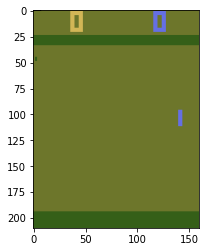

In [17]:
state = env2.reset()
plt.imshow(env2.render(mode='rgb_array'))

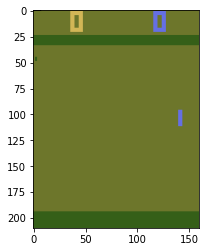

In [18]:
plt.imshow(state)

In [19]:
new_state, reward, done, info = env2.step(0)
reward, done, info

(0.0, False, {'ale.lives': 0})

### 2) 使用可视化帮助理解action

在使用可视化帮助理解action的意义时，一般要进行多次循环才能从连续动画中看出效果，此时要注意，env.step()只有在episode没结束时有效，所以我们需要监视episode是否已经结束，具体方法参考下面的代码

In [22]:
state = env1.reset()
done = False
action = 3 # choose the action you want to understand
t = 0
for _ in range(1000): # 1000 steps
    t += 1
    env1.render() # visualize
    state, reward, done, _ = env1.step(action)
    if done:
        break
t

85

In [23]:
state = env2.reset()
done = False
action = 5 # choose the action you want to understand
t = 0
for _ in range(2000): # 2000 steps
    t += 1
    env2.render() # visualize
    state, reward, done, _ = env2.step(action)
    if done:
        break
t

1033

## 4) 如何完成一个episode

其实这个内容在刚才可视化的代码中已经基本可以看到流程了，在这里我们会忽略可视化的部分，给大家展示如何查看随机策略在多个episode下的平均reward

In [26]:
env = env1
num_episode = 5
max_t = 1000
reward_log = []
t_log = []

for _ in range(num_episode):
    
    # initialize
    env.reset()
    t = 0
    episodic_reward = 0
    
    for t in range(max_t):
        
        env.render()
        action = env.action_space.sample() # random action
        _, reward, done, _ = env.step(action)
        episodic_reward += reward
        if done:
            break
    
    reward_log.append(episodic_reward)
    t_log.append(t)

reward_log, t_log

([-200.552843318798,
  -438.4432970046076,
  -147.83287642194435,
  -409.1101625580932,
  -60.949020225455385],
 [75, 98, 114, 91, 107])

**最后，一个好的习惯是使用`env.close()`关闭已经激活的environment**

In [27]:
env1.close()
env2.close()